# EDA 

Author: hshin337@gatech.edu  
Date: 1/31/2026  

## Findings

1. Traing date range 
    - Start 2010-07-18 
    - End 2025-12-31

2. Prefered columns
     - Date, AdrActCnt, BlkCnt, FlowInExNtv, FlowOutExNtv, TxCnt, ...

2. Drop columns  
    - AseetCreateTime, Asset_IssueTime: meta data for data pipeline, no need for modeling
    - ReferenceRate, ReferenceRateETH, ReferenceRateEUR, ReferenceRateUSD: Focusing on BTC not other
    - PriceBTC: Always 1
    - CapMrktCurUSD / CapMrktEstUSD / CapMrktFFUSD: Duplicated value 

3. Missing value handling
     - No missing value handling for PriceUSD, CapMVRVCur, CapMrktCurUSD, FlowInExUSD because we are going to use data that greater than 2017 


In [28]:
from pathlib import Path
import polars as pl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from eda_starter_template import (
    load_bitcoin_data, 
    load_polymarket_data, 
    analyze_btc_metrics, 
    analyze_polymarket_summary, 
    plot_btc_price, 
    plot_polymarket_volume
)

# --- Configuration ---
# Robustly determine the project root directory
SCRIPT_DIR = Path().resolve()
PROJECT_ROOT = SCRIPT_DIR.parent
DATA_DIR = PROJECT_ROOT / "data"
PLOTS_DIR = SCRIPT_DIR / "plots"
COINMETRICS_PATH = DATA_DIR / "Coin Metrics" / "coinmetrics_btc.csv"
POLYMARKET_DIR = DATA_DIR / "Polymarket"
joined_crypto_summary_std_token_price_index = pl.read_parquet(PROJECT_ROOT / "data" / "joined_crypto_summary_std_token_price_index.parquet")
joined_trump_summary_std_token_price_index = pl.read_parquet(PROJECT_ROOT / "data" / "joined_trump_summary_std_token_price_index.parquet")  

print(f"Project root directory: {PROJECT_ROOT}")

Project root directory: C:\Users\hyuns\workspace\GT-MSA-Spring-2026-Team-09


## Bitcoin

In [2]:
df_btc = load_bitcoin_data(COINMETRICS_PATH)
df_btc

Loading Bitcoin data from C:\Users\hyuns\workspace\GT-MSA-Spring-2026-Team-09\data\Coin Metrics\coinmetrics_btc.csv...
[Memory] Before loading Bitcoin data: 229.37 MB
[Memory] After loading Bitcoin data: 243.75 MB (Δ 14.38 MB)
Successfully loaded 6221 rows.


time,AdrActCnt,AdrBalCnt,AssetCompletionTime,AssetEODCompletionTime,BlkCnt,CapMVRVCur,CapMrktCurUSD,CapMrktEstUSD,FeeTotNtv,FlowInExNtv,FlowInExUSD,FlowOutExNtv,FlowOutExUSD,HashRate,IssTotNtv,IssTotUSD,PriceBTC,PriceUSD,ROI1yr,ROI30d,ReferenceRate,ReferenceRateETH,ReferenceRateEUR,ReferenceRateUSD,SplyCur,SplyExNtv,SplyExUSD,SplyExpFut10yr,TxCnt,TxTfrCnt,volume_reported_spot_usd_1d
datetime[μs],i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,f64
2009-01-03 00:00:00,0,0,1614334883,1614334883,0,null,null,null,0.0,0.0,null,0.0,null,null,null,null,1,null,null,null,null,null,null,null,0.0,0.0,null,null,0,0,null
2009-01-04 00:00:00,0,0,1614334883,1614334883,0,null,null,null,0.0,0.0,null,0.0,null,null,null,null,1,null,null,null,null,null,null,null,0.0,0.0,null,null,0,0,null
2009-01-05 00:00:00,0,0,1614334883,1614334883,0,null,null,null,0.0,0.0,null,0.0,null,null,null,null,1,null,null,null,null,null,null,null,0.0,0.0,null,null,0,0,null
2009-01-06 00:00:00,0,0,1614334884,1614334884,0,null,null,null,0.0,0.0,null,0.0,null,null,null,null,1,null,null,null,null,null,null,null,0.0,0.0,null,null,0,0,null
2009-01-07 00:00:00,0,0,1614334885,1614334885,0,null,null,null,0.0,0.0,null,0.0,null,null,null,null,1,null,null,null,null,null,null,null,0.0,0.0,null,null,0,0,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2026-01-10 00:00:00,608784,55908713,1768101454,1768101454,162,1.610013,1.8058e12,1.8058e12,2.0853467,25172.379573,2.2757e9,25704.121161,2.3238e9,1.1796e9,506.25,4.5768e7,1,90406.142411,-4.593729,-2.394179,90539.603229,29.348301,77853.756824,90539.603229,1.9974e7,2.4808e6,2.2428e11,2.0826e7,492984,1049925,2.9985e9
2026-01-11 00:00:00,536405,55924280,1768186822,1768186822,122,1.615856,1.8120e12,1.8120e12,1.915416,27810.205536,2.5229e9,24486.469835,2.2213e9,8.8831e8,381.25,3.4586e7,1,90717.206315,-4.11103,0.426869,90406.142411,29.333069,77790.505193,90406.142411,1.9974e7,2.4846e6,2.2539e11,2.0826e7,289219,572262,4.3998e9
2026-01-12 00:00:00,638422,55917951,1768275291,1768275291,142,1.623512,1.8205e12,1.8205e12,2.3225772,26842.012928,2.4464e9,29771.239469,2.7134e9,1.0339e9,443.75,4.0444e7,1,91141.149849,-3.404872,0.99272,90717.206315,29.145653,78047.851052,90717.206315,1.9975e7,2.4821e6,2.2622e11,2.0826e7,405384,845895,1.3448e10


In [3]:
analyze_btc_metrics(df_btc)


--- Bitcoin Data Summary ---
shape: (9, 4)
┌────────────┬───────────────┬───────────────┬───────────┐
│ statistic  ┆ PriceUSD      ┆ CapMrktCurUSD ┆ HashRate  │
│ ---        ┆ ---           ┆ ---           ┆ ---       │
│ str        ┆ f64           ┆ f64           ┆ f64       │
╞════════════╪═══════════════╪═══════════════╪═══════════╡
│ count      ┆ 5659.0        ┆ 5659.0        ┆ 6214.0    │
│ null_count ┆ 562.0         ┆ 562.0         ┆ 7.0       │
│ mean       ┆ 19809.987841  ┆ 3.8264e11     ┆ 1.5146e8  │
│ std        ┆ 29699.078673  ┆ 5.8737e11     ┆ 2.6345e8  │
│ min        ┆ 0.050541      ┆ 177670.489754 ┆ 1.9884e-7 │
│ 25%        ┆ 260.651331    ┆ 3.6730e9      ┆ 62.554011 │
│ 50%        ┆ 5728.351702   ┆ 9.7931e10     ┆ 5.5673e6  │
│ 75%        ┆ 28844.613678  ┆ 5.5492e11     ┆ 1.6529e8  │
│ max        ┆ 124824.453667 ┆ 2.4879e12     ┆ 1.3055e9  │
└────────────┴───────────────┴───────────────┴───────────┘
Saved btc_correlation_matrix.png


In [4]:
plot_btc_price(df_btc)

Saved btc_price_history.png


Bitcoin price chart  

![btc_price](./plots/btc_price_history.png)

In [5]:
# # corr heatmap
# plt.figure(figsize=(24, 20))
# sns.heatmap(df_btc.to_pandas().corr(), annot=True, fmt=".2f", cmap="coolwarm")
# plt.title("Correlation Heatmap of Bitcoin Metrics")
# plt.show()

In [6]:
# plt.figure(figsize=(36, 36))
# sns.pairplot(data=df_btc.to_pandas())

In [29]:
df_poly_idx = joined_crypto_summary_std_token_price_index.to_pandas()

daily_poly_index = (
    df_poly_idx.dropna(subset=["created_at", "crypto_poly_index"])
          .assign(date=df_poly_idx["created_at"].dt.date)
          .groupby("date")["crypto_poly_index"]
          .agg(["min", "mean", "max", "sum", "std"]).fillna(0.0)
          .reset_index().set_index("date")
)

daily_poly_index

# # Create complete date range from 2012-01-01 to latest date
# start_date = pd.Timestamp("2012-01-01").date()
# end_date = daily_poly_index["date"].max()
# full_date_range = pd.date_range(start=start_date, end=end_date, freq="D").date

# daily_poly_index_filled = (
#     daily_poly_index.set_index("date")
#     .reindex(full_date_range)
#     .bfill()
#     .ffill()
#     .reset_index()
#     .rename(columns={"index": "date"})
# )

# daily_poly_index_filled

,min,mean,max,sum,std
date,,,,,
2020-10-02,0.224208,0.224208,0.224208,0.224208,0.000000
2020-10-12,0.219289,0.223354,0.227418,0.446708,0.005748
2020-10-21,0.213685,0.213685,0.213685,0.213685,0.000000
2020-10-22,0.251210,0.251210,0.251210,0.251210,0.000000
2020-11-04,0.269835,0.269835,0.269835,0.269835,0.000000
...,...,...,...,...,...
2025-12-06,0.004061,0.231007,0.742832,39.502143,0.142220
2025-12-07,0.000022,0.270044,0.681477,27.814536,0.106868
2025-12-08,0.000000,0.172957,0.715998,33.207765,0.176523


In [32]:
df_trump_idx = joined_trump_summary_std_token_price_index.to_pandas()
daily_trump_index = (
    df_trump_idx.dropna(subset=["created_at", "trump_poly_index"])
          .assign(date=df_trump_idx["created_at"].dt.date)
          .groupby("date")["trump_poly_index"]
          .agg(["min", "mean", "max", "sum", "std"]).fillna(0.0)
          .reset_index().set_index("date")
)

daily_trump_index

,min,mean,max,sum,std
date,,,,,
2020-10-09,0.268014,0.268014,0.268014,0.268014,0.000000
2020-10-30,0.194545,0.194545,0.194545,0.194545,0.000000
2020-11-06,0.215575,0.215575,0.215575,0.215575,0.000000
2020-11-07,0.201393,0.201393,0.201393,0.201393,0.000000
2020-11-08,0.285031,0.285031,0.285031,0.285031,0.000000
...,...,...,...,...,...
2025-12-04,0.108360,0.255592,0.544208,7.923362,0.121119
2025-12-05,0.101311,0.338079,0.581854,21.975143,0.122663
2025-12-07,0.243932,0.243932,0.243932,0.243932,0.000000


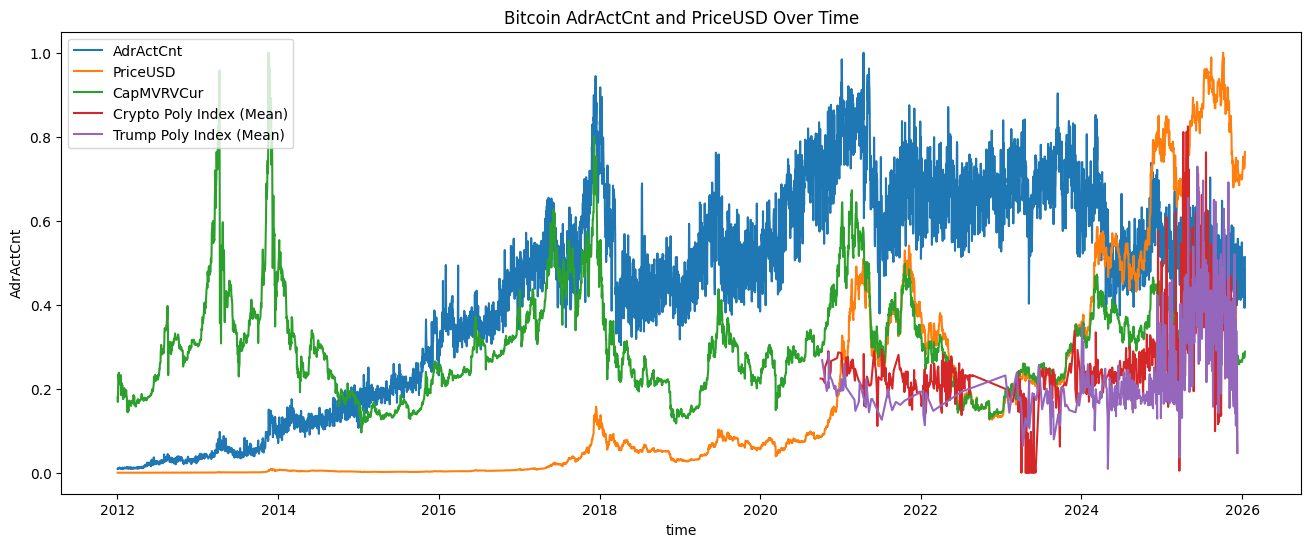

In [33]:
# plot mulitple metrics in line plot using seaborn
df_btc_2012_later = df_btc.filter(pl.col('time') > pl.datetime(2012,1,1))
plt.figure(figsize=(16, 6))
sns.lineplot(data=df_btc_2012_later.to_pandas(), x='time', y=df_btc_2012_later['AdrActCnt']/df_btc_2012_later['AdrActCnt'].max(), label='AdrActCnt')
sns.lineplot(data=df_btc_2012_later.to_pandas(), x='time', y=df_btc_2012_later['PriceUSD']/df_btc_2012_later['PriceUSD'].max(), label='PriceUSD')
sns.lineplot(data=df_btc_2012_later.to_pandas(), x='time', y=df_btc_2012_later['CapMVRVCur']/df_btc_2012_later['CapMVRVCur'].max(), label='CapMVRVCur')
# sns.lineplot(data=df_btc_2012_later.to_pandas(), x='time', y=df_btc_2012_later['CapMrktCurUSD']/df_btc_2012_later['CapMrktCurUSD'].max(), label='CapMrktCurUSD')
# shift the date of daily_poly_index by 20 day earlier to align with the btc metrics
# daily_poly_index['date'] = pd.to_datetime(daily_poly_index['date']) - pd.Timedelta(days=20)
sns.lineplot(data=daily_poly_index, x='date', y='mean', label='Crypto Poly Index (Mean)')
sns.lineplot(data=daily_trump_index, x='date', y='mean', label='Trump Poly Index (Mean)')

plt.title('Bitcoin AdrActCnt and PriceUSD Over Time')
plt.show()

# df_btc.plot(x='time', y=, subplots=True, figsize=(10, 6))

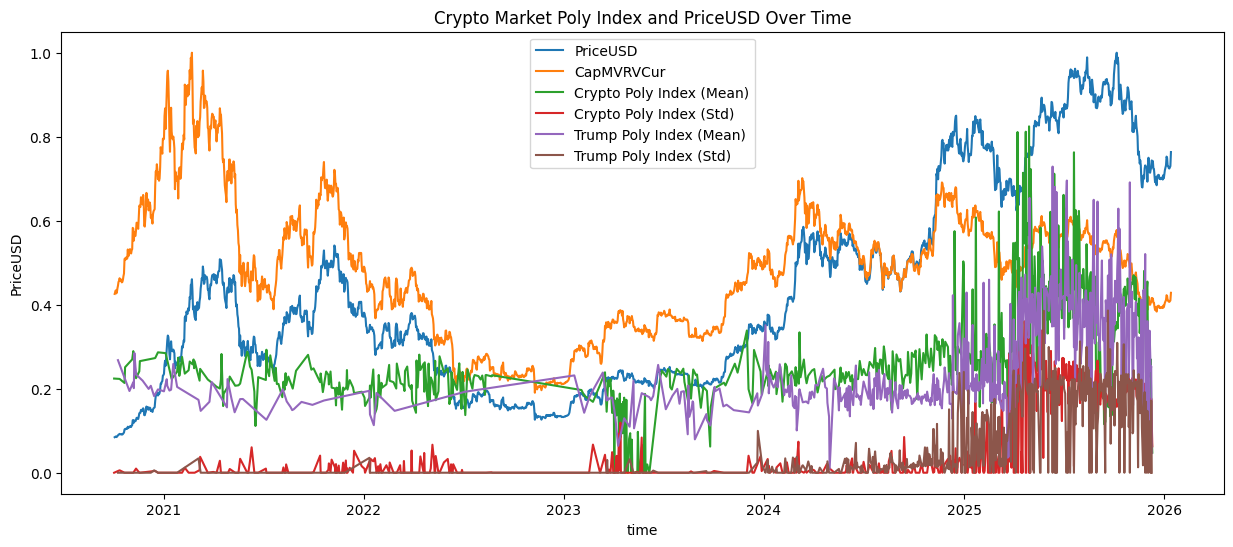

In [34]:
# plot mulitple metrics in line plot using seaborn
# data > 2020-10-02

df_btc_2020_later = df_btc.filter(pl.col('time') > pl.datetime(2020,10,2))
plt.figure(figsize=(15, 6))
# sns.lineplot(data=df_btc_2020_later.to_pandas(), x='time', y=df_btc_2020_later['AdrActCnt']/df_btc_2020_later['AdrActCnt'].max(), label='AdrActCnt')
sns.lineplot(data=df_btc_2020_later.to_pandas(), x='time', y=df_btc_2020_later['PriceUSD']/df_btc_2020_later['PriceUSD'].max(), label='PriceUSD')
sns.lineplot(data=df_btc_2020_later.to_pandas(), x='time', y=df_btc_2020_later['CapMVRVCur']/df_btc_2020_later['CapMVRVCur'].max(), label='CapMVRVCur')
# sns.lineplot(data=df_btc_2020_later.to_pandas(), x='time', y=df_btc_2020_later['CapMrktCurUSD']/df_btc_2020_later['CapMrktCurUSD'].max(), label='CapMrktCurUSD')
# shift the date of daily_poly_index by 20 day earlier to align with the btc metrics
# daily_poly_index['date'] = pd.to_datetime(daily_poly_index['date']) - pd.Timedelta(days=20)
# sns.lineplot(data=daily_poly_index, x='date', y='min', label='Crypto Poly Index (Min)')
sns.lineplot(data=daily_poly_index, x='date', y='mean', label='Crypto Poly Index (Mean)')
# sns.lineplot(data=daily_poly_index, x='date', y='max', label='Crypto Poly Index (Max)')
sns.lineplot(data=daily_poly_index, x='date', y='std', label='Crypto Poly Index (Std)')
# sns.lineplot(data=daily_poly_index, x='date', y=daily_poly_index['sum']/daily_poly_index['sum'].max(), label='Crypto Poly Index (rel_sum)')
sns.lineplot(data=daily_trump_index, x='date', y='mean', label='Trump Poly Index (Mean)')
sns.lineplot(data=daily_trump_index, x='date', y='std', label='Trump Poly Index (Std)')


plt.title('Crypto Market Poly Index and PriceUSD Over Time')
plt.show()


In [36]:
# Join df_btc_2020_later and daily_poly_index and calculate correlation
joined_df = df_btc_2020_later.to_pandas().merge(daily_poly_index.reset_index(), 
                                                left_on=df_btc_2020_later['time'].to_pandas().dt.date, right_on='date', how='inner')
joined_df = joined_df.merge(daily_trump_index.reset_index(), left_on='date', right_on='date', how='inner', suffixes=('_crypto', '_trump'))
price_polyidx_correlation = joined_df['PriceUSD'].corr(joined_df['mean_crypto'])
mvrv_poliyidx_correlation = joined_df['CapMVRVCur'].corr(joined_df['mean_crypto'])
price_trumpidx_correlation = joined_df['PriceUSD'].corr(joined_df['mean_trump'])
mvrv_trumpidx_correlation = joined_df['CapMVRVCur'].corr(joined_df['mean_trump'])


print(f"Correlation between Bitcoin PriceUSD and Crypto Poly Index (Mean) in 2020: {price_polyidx_correlation:.4f}")
print(f"Correlation between Bitcoin CapMVRVCur and Crypto Poly Index (Mean) in 2020: {mvrv_poliyidx_correlation:.4f}")
print(f"Correlation between Bitcoin PriceUSD and Trump Poly Index (Mean) in 2020: {price_trumpidx_correlation:.4f}")
print(f"Correlation between Bitcoin CapMVRVCur and Trump Poly Index (Mean) in 2020: {mvrv_trumpidx_correlation:.4f}")


Correlation between Bitcoin PriceUSD and Crypto Poly Index (Mean) in 2020: 0.5008
Correlation between Bitcoin CapMVRVCur and Crypto Poly Index (Mean) in 2020: 0.2213
Correlation between Bitcoin PriceUSD and Trump Poly Index (Mean) in 2020: 0.5807
Correlation between Bitcoin CapMVRVCur and Trump Poly Index (Mean) in 2020: 0.1759


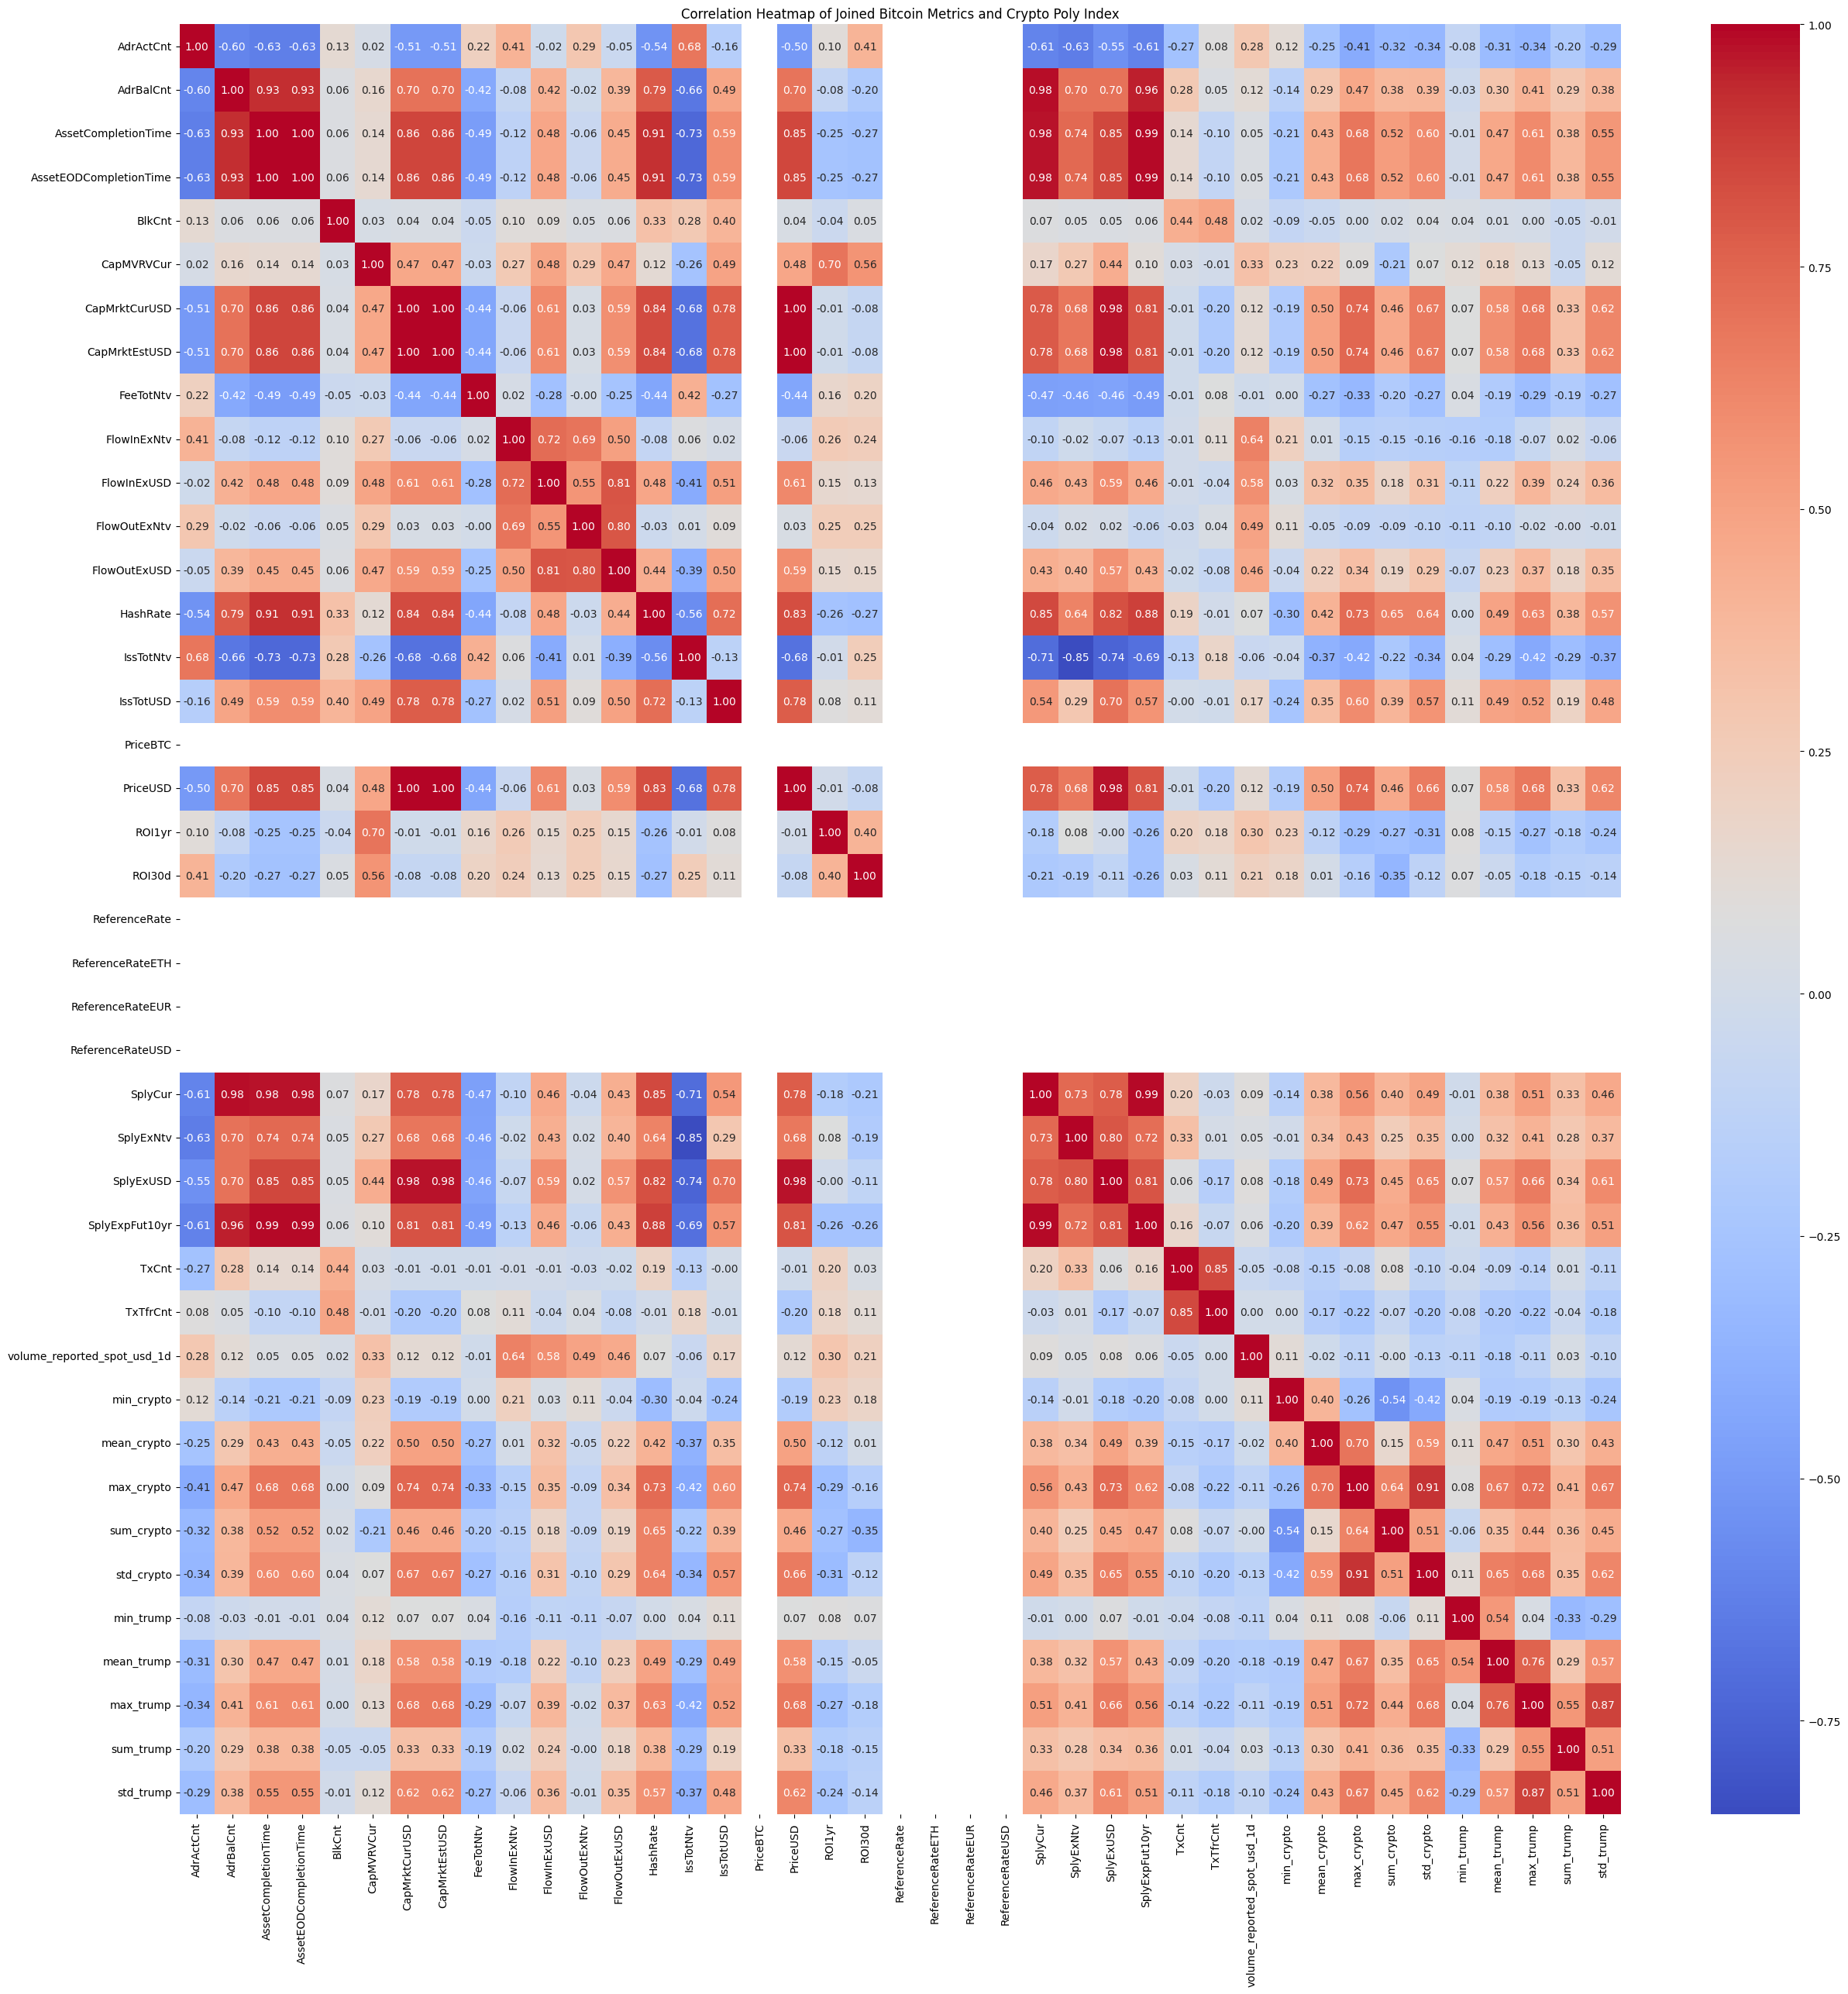

In [37]:
# correlation heatmap of joined_df 
# limited to numerical columns
plt.figure(figsize=(30, 30))
sns.heatmap(joined_df.select_dtypes(include=['number']).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Joined Bitcoin Metrics and Crypto Poly Index")
plt.show()


Correlation between Log-Transformed Bitcoin PriceUSD and Crypto Poly Index (Mean) in 2024: 0.4835
Correlation between Log-Transformed Bitcoin CapMVRVCur and Crypto Poly Index (Mean) in 2024: 0.2468
Correlation between Log-Transformed Bitcoin PriceUSD and Trump Poly Index (Mean) in 2024: 0.5073
Correlation between Log-Transformed Bitcoin CapMVRVCur and Trump Poly Index (Mean) in 2024: 0.2009


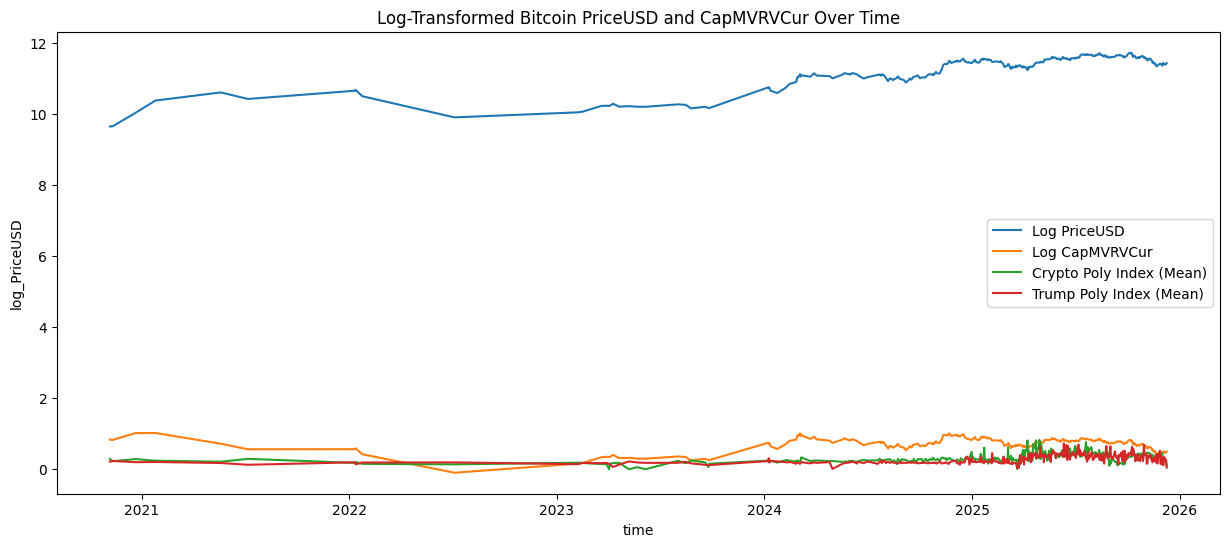

In [40]:
# apply log transformation to PriceUSD and CapMVRVCur and plot again
joined_df['log_PriceUSD'] = np.log(joined_df['PriceUSD'])
joined_df['log_CapMVRVCur'] = np.log(joined_df['CapMVRVCur'])
plt.figure(figsize=(15, 6))
sns.lineplot(data=joined_df, x='time', y='log_PriceUSD', label='Log PriceUSD')
sns.lineplot(data=joined_df, x='time', y='log_CapMVRVCur', label='Log CapMVRVCur')
sns.lineplot(data=joined_df, x='time', y=joined_df['mean_crypto'], label='Crypto Poly Index (Mean)')
sns.lineplot(data=joined_df, x='time', y=joined_df['mean_trump'], label='Trump Poly Index (Mean)')  
plt.title('Log-Transformed Bitcoin PriceUSD and CapMVRVCur Over Time')

log_price_polyidx_correlation = joined_df['log_PriceUSD'].corr(joined_df['mean_crypto'])
log_mvrv_polyidx_correlation = joined_df['log_CapMVRVCur'].corr(joined_df['mean_crypto'])
log_price_trumpidx_correlation = joined_df['log_PriceUSD'].corr(joined_df['mean_trump'])
log_mvrv_trumpidx_correlation = joined_df['log_CapMVRVCur'].corr(joined_df['mean_trump'])

print(f"Correlation between Log-Transformed Bitcoin PriceUSD and Crypto Poly Index (Mean) in 2024: {log_price_polyidx_correlation:.4f}")
print(f"Correlation between Log-Transformed Bitcoin CapMVRVCur and Crypto Poly Index (Mean) in 2024: {log_mvrv_polyidx_correlation:.4f}")
print(f"Correlation between Log-Transformed Bitcoin PriceUSD and Trump Poly Index (Mean) in 2024: {log_price_trumpidx_correlation:.4f}")
print(f"Correlation between Log-Transformed Bitcoin CapMVRVCur and Trump Poly Index (Mean) in 2024: {log_mvrv_trumpidx_correlation:.4f}")   
plt.show()

What if Poly market move faster than BTCUSD Price?  
- Apply lag to see corr()


In [25]:
# apply lag of 7 days to daily_poly_index and calculate correlation again
# daily_poly_index has 'date' as index, so reset first and create a lagged date column
daily_poly_index_lagged = daily_poly_index.reset_index().copy()
daily_poly_index_lagged['date'] = pd.to_datetime(daily_poly_index_lagged['date']) - pd.Timedelta(days=7)

btc_2020_later_pd = df_btc_2020_later.to_pandas().copy()
btc_2020_later_pd['date'] = pd.to_datetime(btc_2020_later_pd['time']).dt.date
daily_poly_index_lagged['date'] = pd.to_datetime(daily_poly_index_lagged['date']).dt.date

joined_df_lagged = btc_2020_later_pd.merge(
    daily_poly_index_lagged,
    on='date',
    how='inner'
 )

price_polyidx_lagged_correlation = joined_df_lagged['PriceUSD'].corr(joined_df_lagged['mean'])
mvrv_polyidx_lagged_correlation = joined_df_lagged['CapMVRVCur'].corr(joined_df_lagged['mean'])

print(f"Correlation between Bitcoin PriceUSD and Crypto Poly Index (Mean) with 7-day lag in 2020: {price_polyidx_lagged_correlation:.4f}")
print(f"Correlation between Bitcoin CapMVRVCur and Crypto Poly Index (Mean) with 7-day lag in 2020: {mvrv_polyidx_lagged_correlation:.4f}")

Correlation between Bitcoin PriceUSD and Crypto Poly Index (Mean) with 7-day lag in 2020: 0.6306
Correlation between Bitcoin CapMVRVCur and Crypto Poly Index (Mean) with 7-day lag in 2020: 0.2928


In [26]:
# Compare candidate lags and pick the best one by absolute correlation
candidate_lags = list(range(-1, -31, -1))  # -1 ... -30

btc_2020_later_pd = df_btc_2020_later.to_pandas().copy()
btc_2020_later_pd['date'] = pd.to_datetime(btc_2020_later_pd['time']).dt.date

base_poly = daily_poly_index.reset_index().copy()
base_poly['date'] = pd.to_datetime(base_poly['date'])

results = []
for lag in candidate_lags:
    poly_lagged = base_poly.copy()
    poly_lagged['date'] = (poly_lagged['date'] + pd.Timedelta(days=lag)).dt.date

    merged = btc_2020_later_pd.merge(poly_lagged, on='date', how='inner')
    if len(merged) < 3:
        results.append({
            'lag_days': lag,
            'n_rows': len(merged),
            'corr_price_poly_mean': np.nan,
            'corr_mvrv_poly_mean': np.nan,
            'corr_price_mvrv': np.nan
        })
        continue

    corr_price = merged['PriceUSD'].corr(merged['mean'])
    corr_mvrv = merged['CapMVRVCur'].corr(merged['mean'])
    corr_price_mvrv = merged['PriceUSD'].corr(merged['CapMVRVCur'])

    results.append({
        'lag_days': lag,
        'n_rows': len(merged),
        'corr_price_poly_mean': corr_price,
        'corr_mvrv_poly_mean': corr_mvrv,
        'corr_price_mvrv': corr_price_mvrv
    })

lag_eval = pd.DataFrame(results).sort_values('lag_days').reset_index(drop=True)
lag_eval['abs_corr_price'] = lag_eval['corr_price_poly_mean'].abs()
lag_eval['abs_corr_mvrv'] = lag_eval['corr_mvrv_poly_mean'].abs()
lag_eval['abs_corr_price_mvrv'] = lag_eval['corr_price_mvrv'].abs()

print('Lag comparison table')
print(lag_eval.to_string(index=False))

best_lag_price = lag_eval.loc[lag_eval['abs_corr_price'].idxmax(), 'lag_days']
best_lag_mvrv = lag_eval.loc[lag_eval['abs_corr_mvrv'].idxmax(), 'lag_days']
best_lag_price_mvrv = lag_eval.loc[lag_eval['abs_corr_price_mvrv'].idxmax(), 'lag_days']

print(f"\nBest lag for PriceUSD vs PolyIndex(mean): {best_lag_price} days")
print(f"Best lag for CapMVRVCur vs PolyIndex(mean): {best_lag_mvrv} days")
print(f"Best lag for PriceUSD vs CapMVRVCur: {best_lag_price_mvrv} days")

Lag comparison table
 lag_days  n_rows  corr_price_poly_mean  corr_mvrv_poly_mean  corr_price_mvrv  abs_corr_price  abs_corr_mvrv  abs_corr_price_mvrv
      -30     693              0.599714             0.279226         0.505765        0.599714       0.279226             0.505765
      -29     693              0.601522             0.281982         0.503988        0.601522       0.281982             0.503988
      -28     693              0.603477             0.282750         0.502759        0.603477       0.282750             0.502759
      -27     693              0.605692             0.284647         0.500391        0.605692       0.284647             0.500391
      -26     693              0.606053             0.287089         0.504224        0.606053       0.287089             0.504224
      -25     693              0.610124             0.293533         0.506388        0.610124       0.293533             0.506388
      -24     693              0.611246             0.292890         

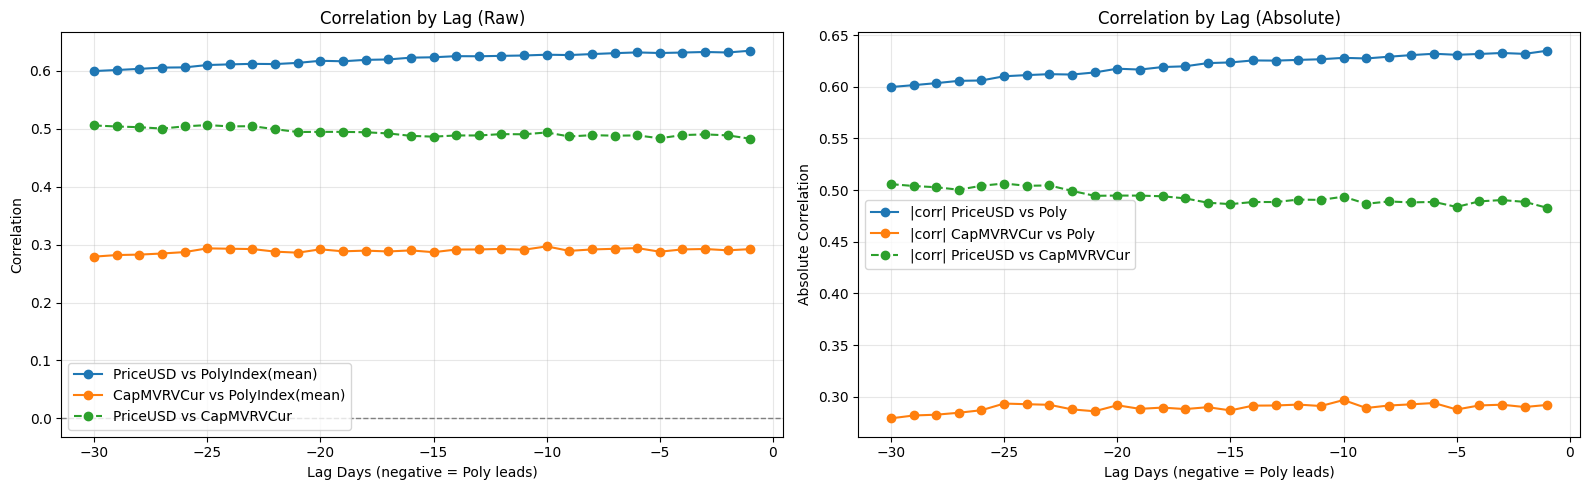

Best lag for PriceUSD vs PolyIndex(mean): -1 (|corr|=0.6348)
Best lag for CapMVRVCur vs PolyIndex(mean): -10 (|corr|=0.2969)
Best lag for PriceUSD vs CapMVRVCur: -25 (|corr|=0.5064)


In [27]:
# Visualize correlation changes over lag days
# If lag_eval was created by an older cell version, backfill missing columns first
if 'corr_price_mvrv' not in lag_eval.columns:
    btc_2020_later_pd = df_btc_2020_later.to_pandas().copy()
    btc_2020_later_pd['date'] = pd.to_datetime(btc_2020_later_pd['time']).dt.date

    base_poly = daily_poly_index.reset_index().copy()
    base_poly['date'] = pd.to_datetime(base_poly['date'])

    corr_price_mvrv_vals = []
    for lag in lag_eval['lag_days'].tolist():
        poly_lagged = base_poly.copy()
        poly_lagged['date'] = (poly_lagged['date'] + pd.Timedelta(days=int(lag))).dt.date
        merged = btc_2020_later_pd.merge(poly_lagged, on='date', how='inner')
        corr_val = merged['PriceUSD'].corr(merged['CapMVRVCur']) if len(merged) >= 3 else np.nan
        corr_price_mvrv_vals.append(corr_val)

    lag_eval = lag_eval.copy()
    lag_eval['corr_price_mvrv'] = corr_price_mvrv_vals

if 'abs_corr_price_mvrv' not in lag_eval.columns:
    lag_eval = lag_eval.copy()
    lag_eval['abs_corr_price_mvrv'] = lag_eval['corr_price_mvrv'].abs()

plot_df = lag_eval.copy().sort_values('lag_days')

fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True)

# Raw correlations
axes[0].plot(plot_df['lag_days'], plot_df['corr_price_poly_mean'], marker='o', label='PriceUSD vs PolyIndex(mean)')
axes[0].plot(plot_df['lag_days'], plot_df['corr_mvrv_poly_mean'], marker='o', label='CapMVRVCur vs PolyIndex(mean)')
axes[0].plot(plot_df['lag_days'], plot_df['corr_price_mvrv'], marker='o', linestyle='--', label='PriceUSD vs CapMVRVCur')
axes[0].axhline(0, color='gray', linestyle='--', linewidth=1)
axes[0].set_title('Correlation by Lag (Raw)')
axes[0].set_xlabel('Lag Days (negative = Poly leads)')
axes[0].set_ylabel('Correlation')
axes[0].grid(alpha=0.3)
axes[0].legend()

# Absolute correlations
axes[1].plot(plot_df['lag_days'], plot_df['abs_corr_price'], marker='o', label='|corr| PriceUSD vs Poly')
axes[1].plot(plot_df['lag_days'], plot_df['abs_corr_mvrv'], marker='o', label='|corr| CapMVRVCur vs Poly')
axes[1].plot(plot_df['lag_days'], plot_df['abs_corr_price_mvrv'], marker='o', linestyle='--', label='|corr| PriceUSD vs CapMVRVCur')
axes[1].set_title('Correlation by Lag (Absolute)')
axes[1].set_xlabel('Lag Days (negative = Poly leads)')
axes[1].set_ylabel('Absolute Correlation')
axes[1].grid(alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

# Highlight best lag points
best_price_row = plot_df.loc[plot_df['abs_corr_price'].idxmax()]
best_mvrv_row = plot_df.loc[plot_df['abs_corr_mvrv'].idxmax()]
best_price_mvrv_row = plot_df.loc[plot_df['abs_corr_price_mvrv'].idxmax()]
print(f"Best lag for PriceUSD vs PolyIndex(mean): {int(best_price_row['lag_days'])} (|corr|={best_price_row['abs_corr_price']:.4f})")
print(f"Best lag for CapMVRVCur vs PolyIndex(mean): {int(best_mvrv_row['lag_days'])} (|corr|={best_mvrv_row['abs_corr_mvrv']:.4f})")
print(f"Best lag for PriceUSD vs CapMVRVCur: {int(best_price_mvrv_row['lag_days'])} (|corr|={best_price_mvrv_row['abs_corr_price_mvrv']:.4f})")

## Lag Interpretation Notes (Poly Index vs BTC) — Summary (Updated)

### Can we claim “Polymarket leads BTC by 30 days”?
**No.** The updated results show interesting lagged correlation patterns, but they are **not strong enough** to assert a predictive lead.

### What the updated results actually show
- **PriceUSD vs PolyIndex(mean): best lag = -1 days (|corr| = 0.6348)**  
- **CapMVRVCur vs PolyIndex(mean): best lag = -10 days (|corr| = 0.2969)**  
- **PriceUSD vs CapMVRVCur: best lag = -25 days (|corr| = 0.5064)**  

These indicate **short‑horizon alignment** (e.g., -1 day) and **some medium‑lag structure**, but not a stable or causal lead.

In [16]:
print("End of Notebook")

End of Notebook
